# Telecom Churn Case Study

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Loading required Libraries and importing Dataset

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
warnings.filterwarnings('ignore')
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [3]:
# Checking data shape

data_dict.head()

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls


In [4]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [7]:
data = data.drop('circle_id', axis=1)

In [8]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [9]:
data.select_dtypes(include=['object'])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


# 2. Handling Missing data

lets analyse the missing data.

In [10]:
length = 69999


In [11]:
pd.options.display.max_columns =100

In [12]:
# Checking how much data is missing/null

print(100*(data.isnull().sum()/length))

id                      0.000000
loc_og_t2o_mou          1.002871
std_og_t2o_mou          1.002871
loc_ic_t2o_mou          1.002871
last_date_of_month_6    0.000000
                          ...   
aon                     0.000000
aug_vbc_3g              0.000000
jul_vbc_3g              0.000000
jun_vbc_3g              0.000000
churn_probability       0.000000
Length: 171, dtype: float64


In [13]:
# Saving those columns which have more than 40% missing values in a variable and droping those columns

col = 100*(data.isnull().sum()/length)>40
null_col = data.loc[:, col]
null_col

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,NaN,7/31/2014,8/21/2014,NaN,7.0,1.0,NaN,25.0,17.0,NaN,6.0,1.0,NaN,1.0,0.0,NaN,135.0,17.0,NaN,21.91,0.00,NaN,60.61,48.00,NaN,0.0,0.0,NaN,1.0,1.0
69995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,6/17/2014,7/13/2014,8/14/2014,1.0,1.0,1.0,179.0,252.0,145.0,0.0,0.0,0.0,1.0,1.0,1.0,179.0,252.0,145.0,150.67,212.18,122.08,150.67,212.17,122.07,0.0,0.0,0.0,1.0,1.0,1.0


In [14]:
data = data.drop(null_col, axis=1)
data.shape

(69999, 141)

In [15]:
# Dropping those columns which have no/less variance 

data = data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','monthly_2g_6','monthly_2g_7','monthly_2g_8'], axis=1)

In [16]:
data = data.drop(['std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_8'], axis=1)

In [17]:
#Checking how much columns are having null/missing values

dt = 100*data.isnull().sum()/length != 0.0
null_col2 = data.loc[:, dt]
null_col2.describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000
mean,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.024425,0.033059,48.043255,47.882736,47.256388,107.152439,106.489856,108.154731,12.050672,12.563665,11.716763,167.255126,166.945103,167.136761,9.476958,9.873468,9.910217,20.734858,21.685359,21.089042,2.146273,2.199395,2.075179,32.360632,33.760809,33.077030,0.061932,0.033371,0.040392,7.394167,8.171162,8.348424,0.854063,1.019680,0.963214
std,299.963093,311.277193,311.896596,316.818355,322.482226,324.089234,57.374429,55.960985,53.408135,73.469261,58.511894,64.618388,150.971758,154.739002,153.716880,162.046699,153.852597,152.997805,13.319542,13.568110,13.009193,5.741811,7.914113,6.542202,252.034597,246.313148,245.342359,255.098355,266.693254,267.021929,255.771554,267.532089,270.032002,8.136645,8.325206,392.046600,409.299501,410.697098,29.747486,29.220073,29.563367,15.854529,22.229842,17.708507,4.768437,1.716430,2.232547,140.499757,147.761124,141.249368,168.455999,165.452459,166.223461,39.416076,43.495179,38.606895,252.576231,254.688718,249.288410,51.664472,56.137824,54.248186,80.294236,87.314510,81.534344,16.522232,16.171533,15.865403,104.381082,114.142230,108.469864,0.164823,0.137322,0.148417,60.951165,63.604165,63.097570,12.149144,13.225373,11.697686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [18]:
# imputing Missing NaN/Null values with mean of the column

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [19]:
# imputing Missing NaN/Null values with mean of the column cont..

missing_data_percent = data.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'lo

In [20]:
data[impute_cols] = imputer.fit_transform(data[impute_cols])

In [21]:
#checking how much missing data is present

null_col = 100*(data.isnull().sum()/length) != 0
null_col = data.loc[:, col]
null_col

""
0
1
2
3
4
...
69994
69995
69996
69997


In [22]:
#dropping id since its not useful for our analysis

data = data.drop('id', axis=1)

# 3. Preprocessing and EDA

<Axes: >

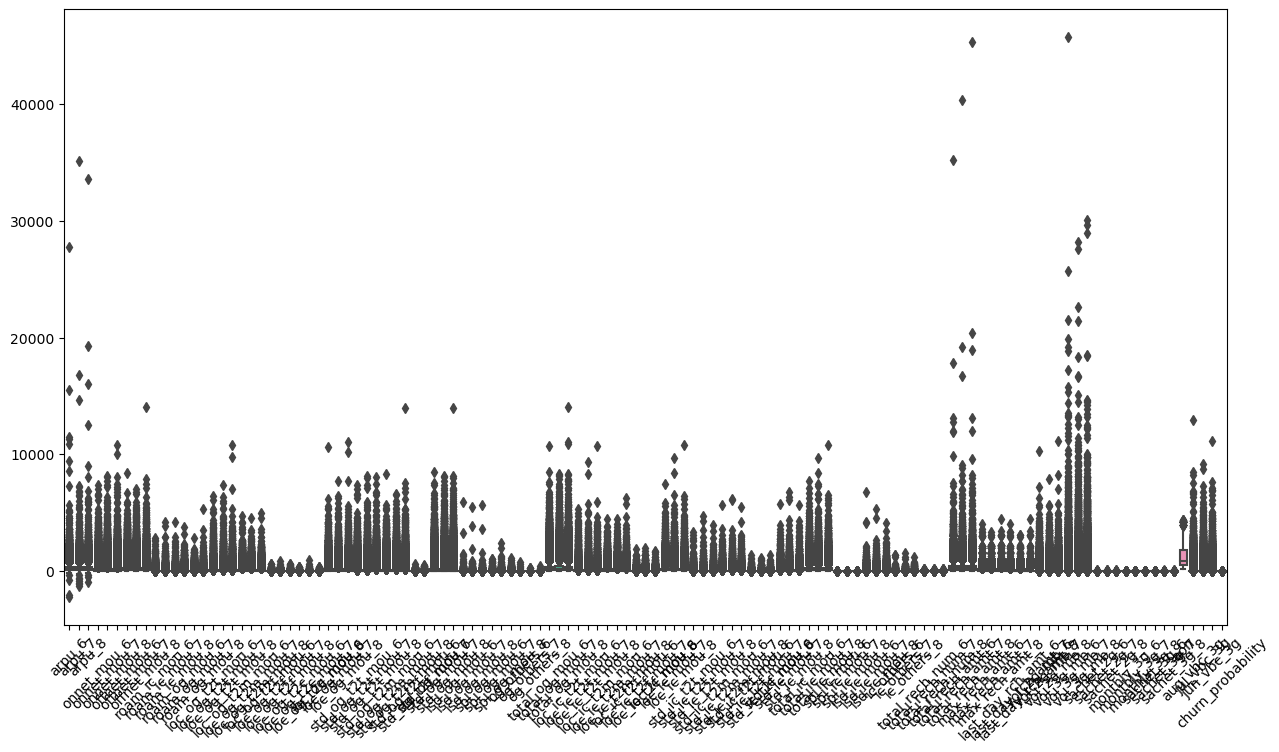

In [23]:
# Building a boxplot graph to see the spread of the data in the dataset

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data)

In [24]:
# Creating X any y variable with x containing all predictor variables and y containing target variable

X = data.drop('churn_probability', axis=1)

y = data['churn_probability']

print(X.shape)
print(y.shape)

(69999, 120)
(69999,)


In [25]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,...,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,...,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,...,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,...,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,50,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,982,0.0,0.0,0.0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.0,0.00,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,290,136,122,50,41,30,25,10,30,390.8,308.89,213.47,0.0,0.00,0.0,7,6,6,0,0,0,0,1,0,647,0.0,0.0,0.0


In [26]:
#Scaling Preddictor vaariables(X) with MinMaxScaler

cols = X.columns
scaler = MinMaxScaler()
X[cols] = scaler.fit_transform(X[cols])

In [27]:
X.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,...,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.084757,0.043032,0.035508,0.018050,0.016413,0.012367,0.023782,0.027989,0.014031,0.003425,0.001688,0.001680,0.003758,0.003500,0.001831,0.007293,0.006238,0.004249,0.019851,0.019925,0.018366,0.006061,0.004633,0.006224,0.003284,0.001485,0.004038,0.013520,0.018339,0.012724,0.010944,0.010300,0.010415,0.010602,0.013822,0.006494,0.001792,0.002327,0.020147,0.021630,0.012526,0.000143,0.000148,0.000148,0.003869,0.002098,0.004693,0.000578,0.000090,0.000084,...,0.003825,0.001589,0.001936,0.001488,0.005665,0.005005,0.005845,0.025882,0.020814,0.018327,0.003134,0.002479,0.002396,0.001089,0.001545,0.002023,0.000627,0.000682,0.000796,0.044509,0.055845,0.052355,0.009325,0.007992,0.007146,0.026077,0.031566,0.024172,0.015817,0.019127,0.014046,0.005033,0.006508,0.004509,0.002671,0.004581,0.004511,0.009259,0.009196,0.010216,0.008424,0.004858,0.005122,0.002598,0.002468,0.002085,0.250334,0.005273,0.007194,0.005380
std,0.011144,0.009451,0.010204,0.039851,0.037418,0.028229,0.037130,0.044894,0.022517,0.019723,0.013205,0.012465,0.019073,0.020404,0.011783,0.023006,0.020504,0.013913,0.033812,0.033106,0.030011,0.021137,0.016319,0.021521,0.016412,0.008470,0.018096,0.023207,0.031472,0.021627,0.033938,0.032153,0.032424,0.030147,0.039614,0.018838,0.012686,0.017527,0.045561,0.049214,0.028590,0

<Axes: >

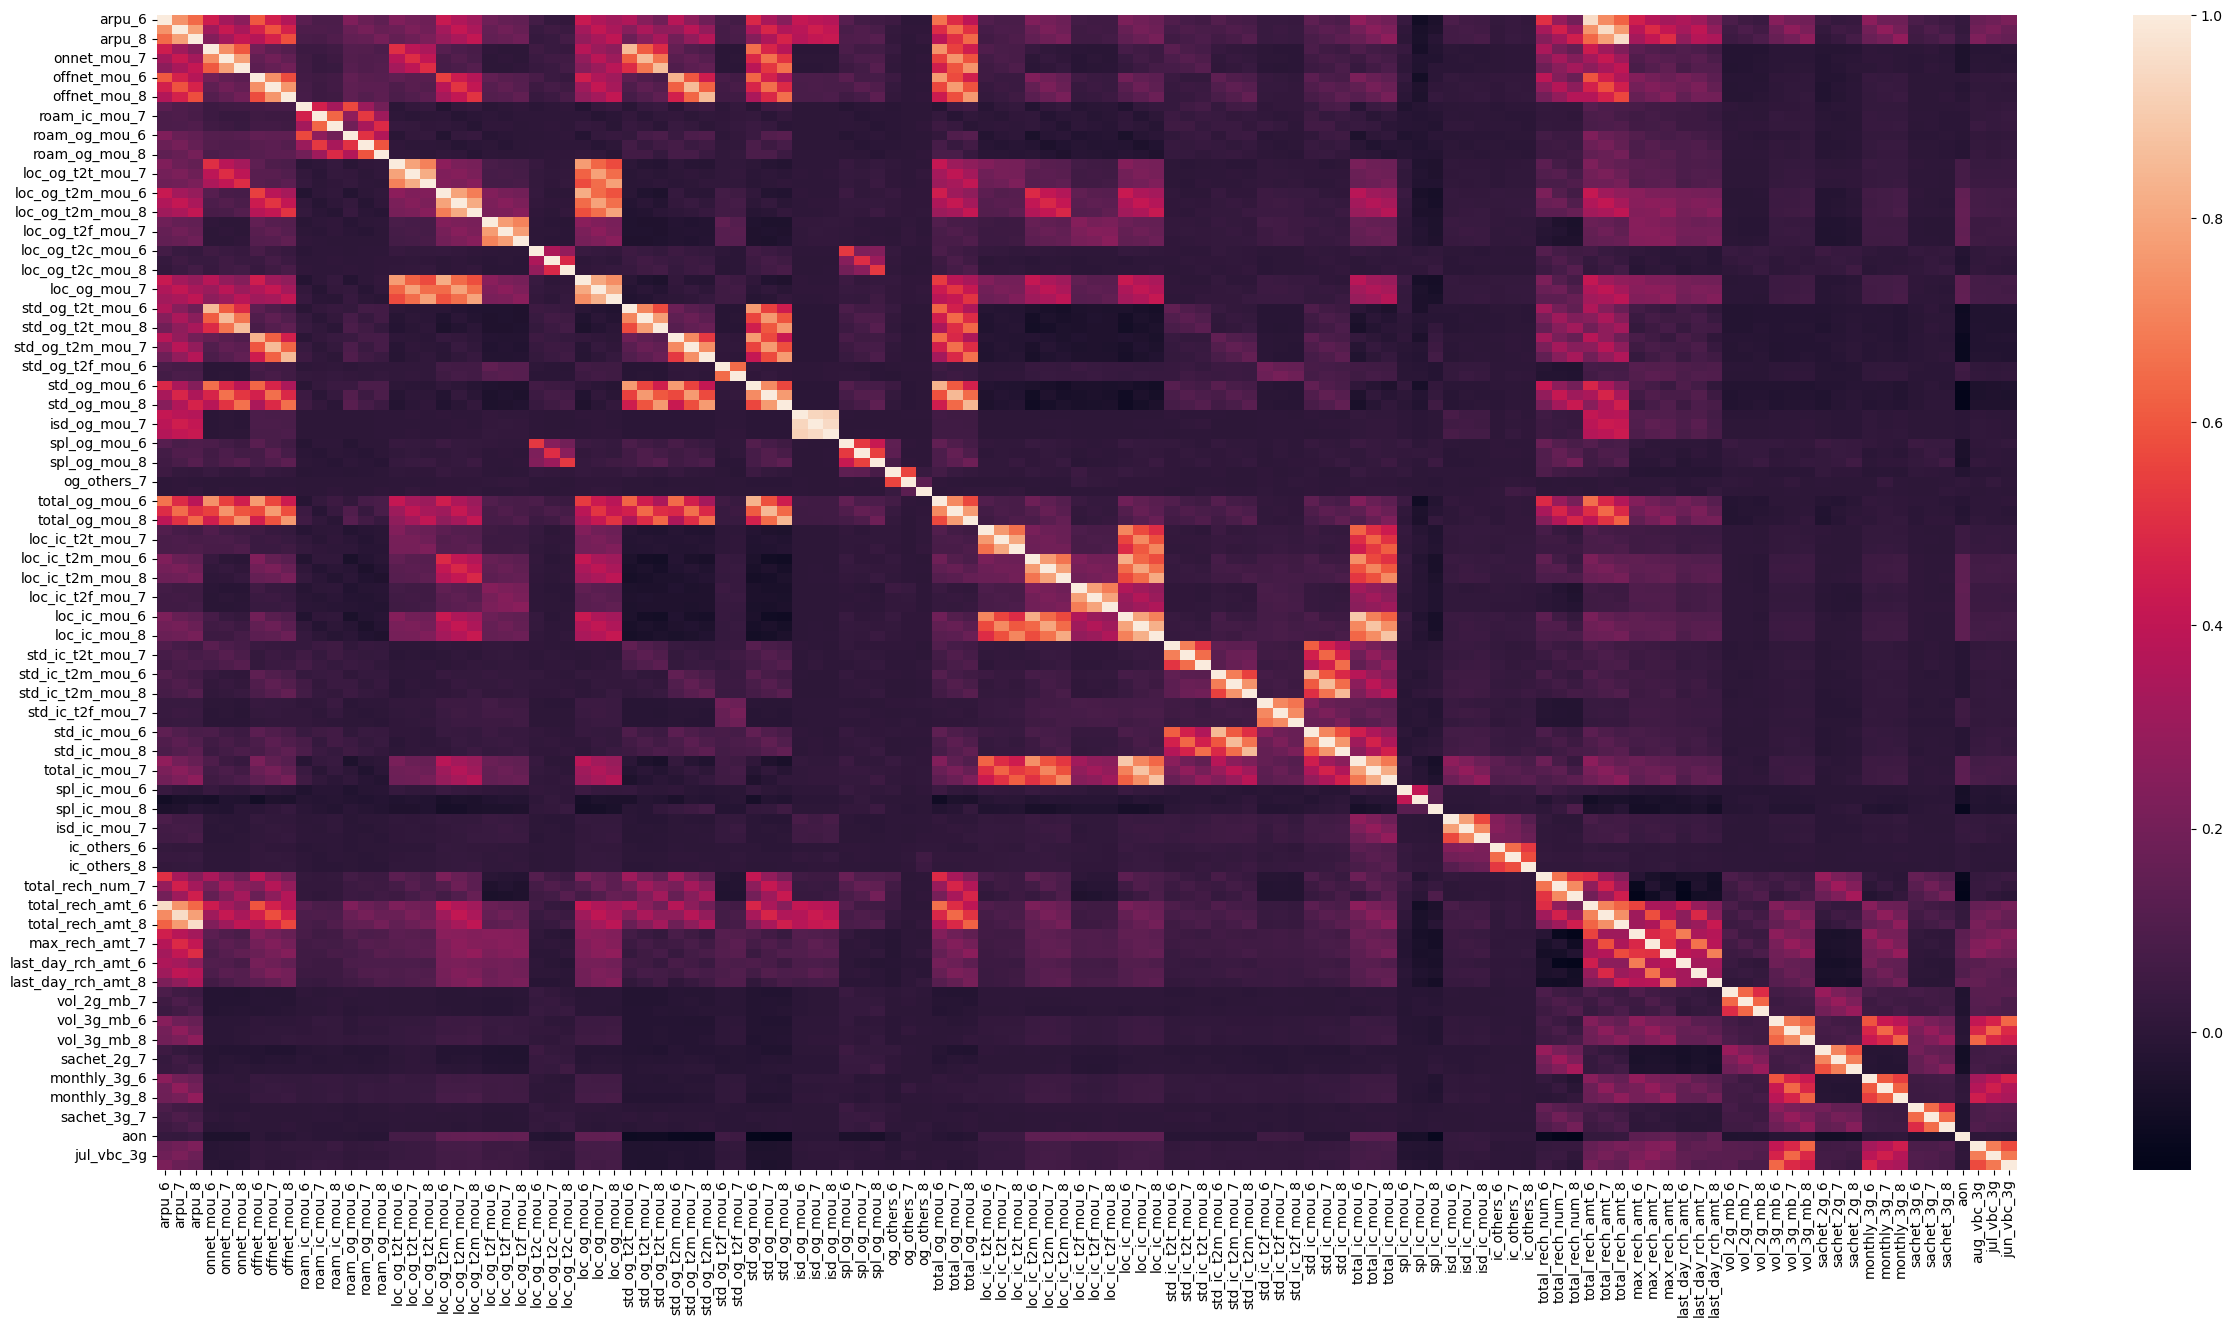

In [28]:
# Building Heatmap to check Corelation between Perdictor variables

plt.figure(figsize=(30,15))
sns.heatmap(X.corr())

In [29]:
# Building test and train data with 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 120), (14000, 120), (55999,), (14000,))

<Axes: xlabel='churn_probability', ylabel='Count'>

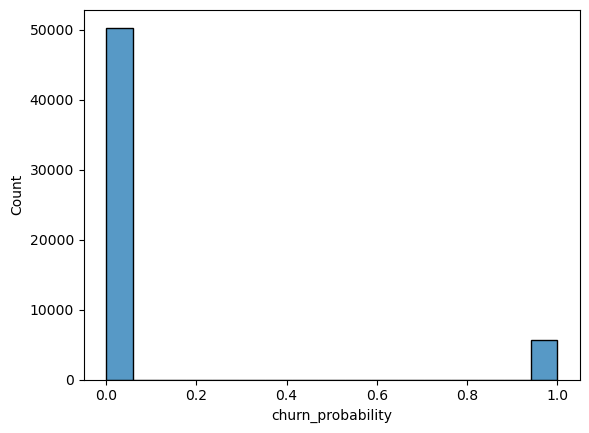

In [30]:
# building a Histplot to check the balance between 0 and 1 value of churn probability

sns.histplot(y_train)

# 4.0 Feature engineering and selection

In [31]:
# building Random forest classifier model and fitting the data to do feature importance

rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [32]:
# Creating a dataframe to store all column names in col and its corresponding importance in the importance column and sorting it
# by descending

feature_importances = pd.DataFrame({'col':cols, 'importance':rf.feature_importances_})
feature_importances.sort_values(by = 'importance', ascending=False)

,col,importance
49,og_others_8,0.120237
79,total_ic_mou_8,0.074685
11,roam_ic_mou_8,0.044052
43,isd_og_mou_8,0.032638
94,total_rech_amt_8,0.027019
...,...,...
111,monthly_3g_7,0.000993
113,sachet_3g_6,0.000769
114,sachet_3g_7,0.000644
115,sachet_3g_8,0.000589


### As we can see, total_rech_amt_6, total_rech_num_8 and std_ic_mou_6 are the top 3 important variables. If we look at the data dictonaty, we can understand that the important features are 'Total Recharge Amount in month of June', 'Total Recharge Amount in month of August' and 'minutes spent in incoming calls in standard calls outside calling circle.

### Using the above information, the company can then make an informed decision on where to focus their efforts like they can rollout offers in june and august to still increase the recharge amount and make sure the users can make call in standard ouside cirlces to make more customers not churn.

<BarContainer object of 120 artists>

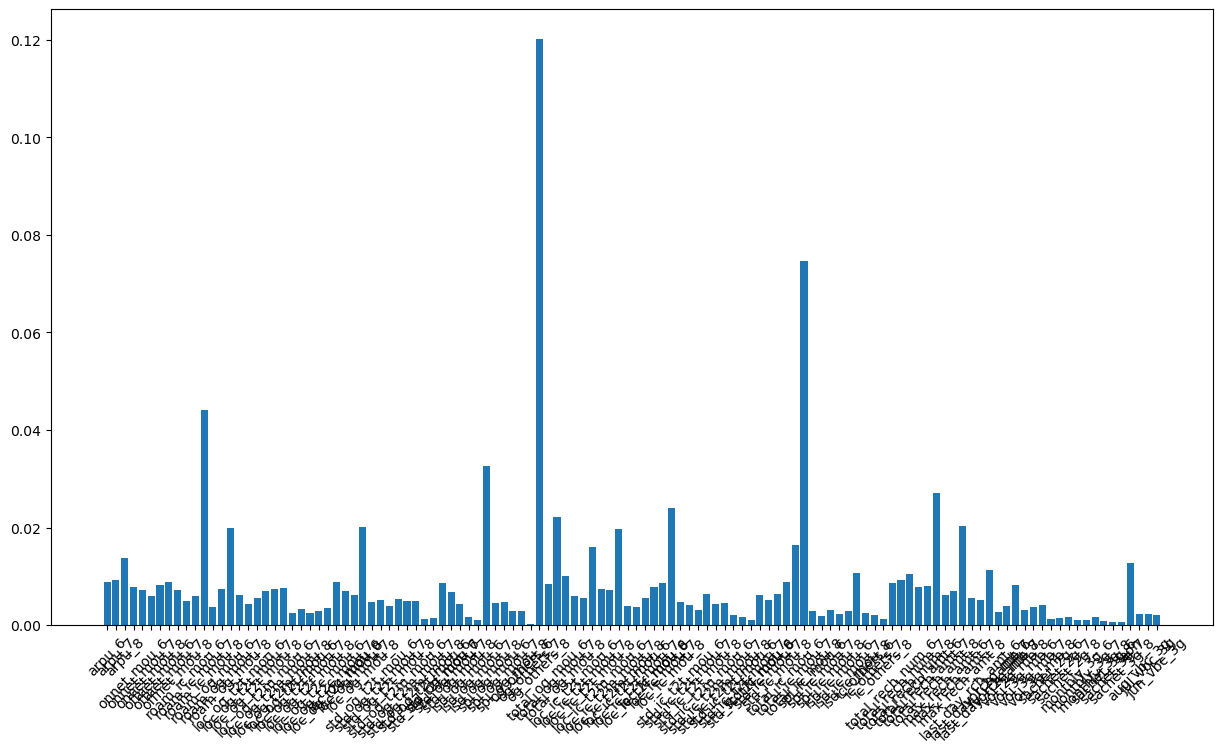

In [33]:
# Bar Graph of all the columns with their feature importance.

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

<Axes: >

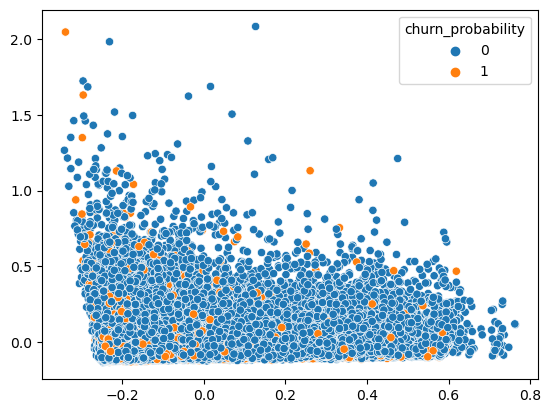

In [34]:
# building and fitting PCA(99% variance) to train data

pca = PCA(0.99)
pca_components = pca.fit_transform(X_train)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

<Axes: >

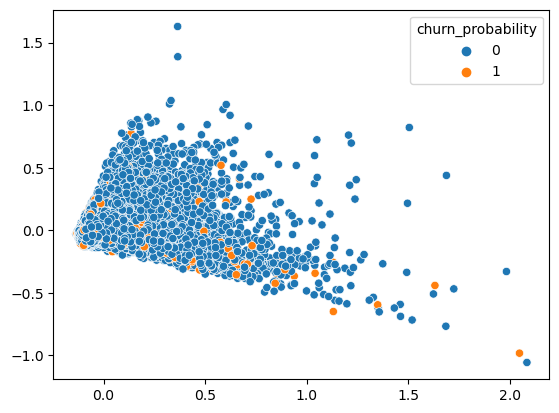

In [35]:
# Scatterplot for pca components

sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

In [36]:
pca_components

array([[ 4.61279978e-01,  3.14167968e-02, -6.30475413e-02, ...,
        -2.93843709e-03, -4.55797332e-03,  8.20454833e-04],
       [ 1.00294824e-01, -5.78860275e-02,  8.32417930e-03, ...,
        -1.89913221e-03,  1.25792700e-03, -7.96193740e-04],
       [-4.25584130e-03,  7.36605078e-01, -2.61259736e-01, ...,
         5.92611857e-03,  1.12359478e-04, -7.85830454e-03],
       ...,
       [-1.08050433e-01, -5.90467031e-02,  2.69376100e-02, ...,
         1.68493255e-03,  2.47573158e-03,  7.08434070e-04],
       [-9.62264271e-02,  7.04583008e-02,  2.16762872e-01, ...,
         1.72440570e-02, -2.67889848e-03,  3.65437673e-03],
       [-9.85766637e-02,  2.25690840e-02,  7.24651068e-02, ...,
        -1.15747660e-03, -4.62765400e-03, -2.99548108e-03]])

In [37]:
rf.feature_importances_

array([0.00891568, 0.0092161 , 0.01383768, 0.00783837, 0.0071882 ,
       0.00600852, 0.00829862, 0.00893757, 0.00722802, 0.00500594,
       0.00602194, 0.04405204, 0.00376937, 0.00740228, 0.0199395 ,
       0.00625647, 0.0042633 , 0.00556599, 0.00695667, 0.00733224,
       0.00771876, 0.00256777, 0.00326335, 0.00257698, 0.00301219,
       0.00344154, 0.00887458, 0.00696423, 0.00612621, 0.02012593,
       0.00483904, 0.00526046, 0.00386683, 0.00541639, 0.00504283,
       0.00504032, 0.00124656, 0.00144483, 0.00873482, 0.00678786,
       0.00443463, 0.00162306, 0.00100437, 0.03263775, 0.00452297,
       0.00468201, 0.00299446, 0.0028535 , 0.00017568, 0.12023661,
       0.00846109, 0.02216928, 0.01004931, 0.00598366, 0.00554927,
       0.01613141, 0.00744361, 0.00714902, 0.01974831, 0.00388948,
       0.00381138, 0.00552766, 0.00781904, 0.00856145, 0.02396611,
       0.00475934, 0.00421064, 0.0031891 , 0.0063391 , 0.00429662,
       0.00446557, 0.00199919, 0.00164898, 0.00106295, 0.00624

<BarContainer object of 66 artists>

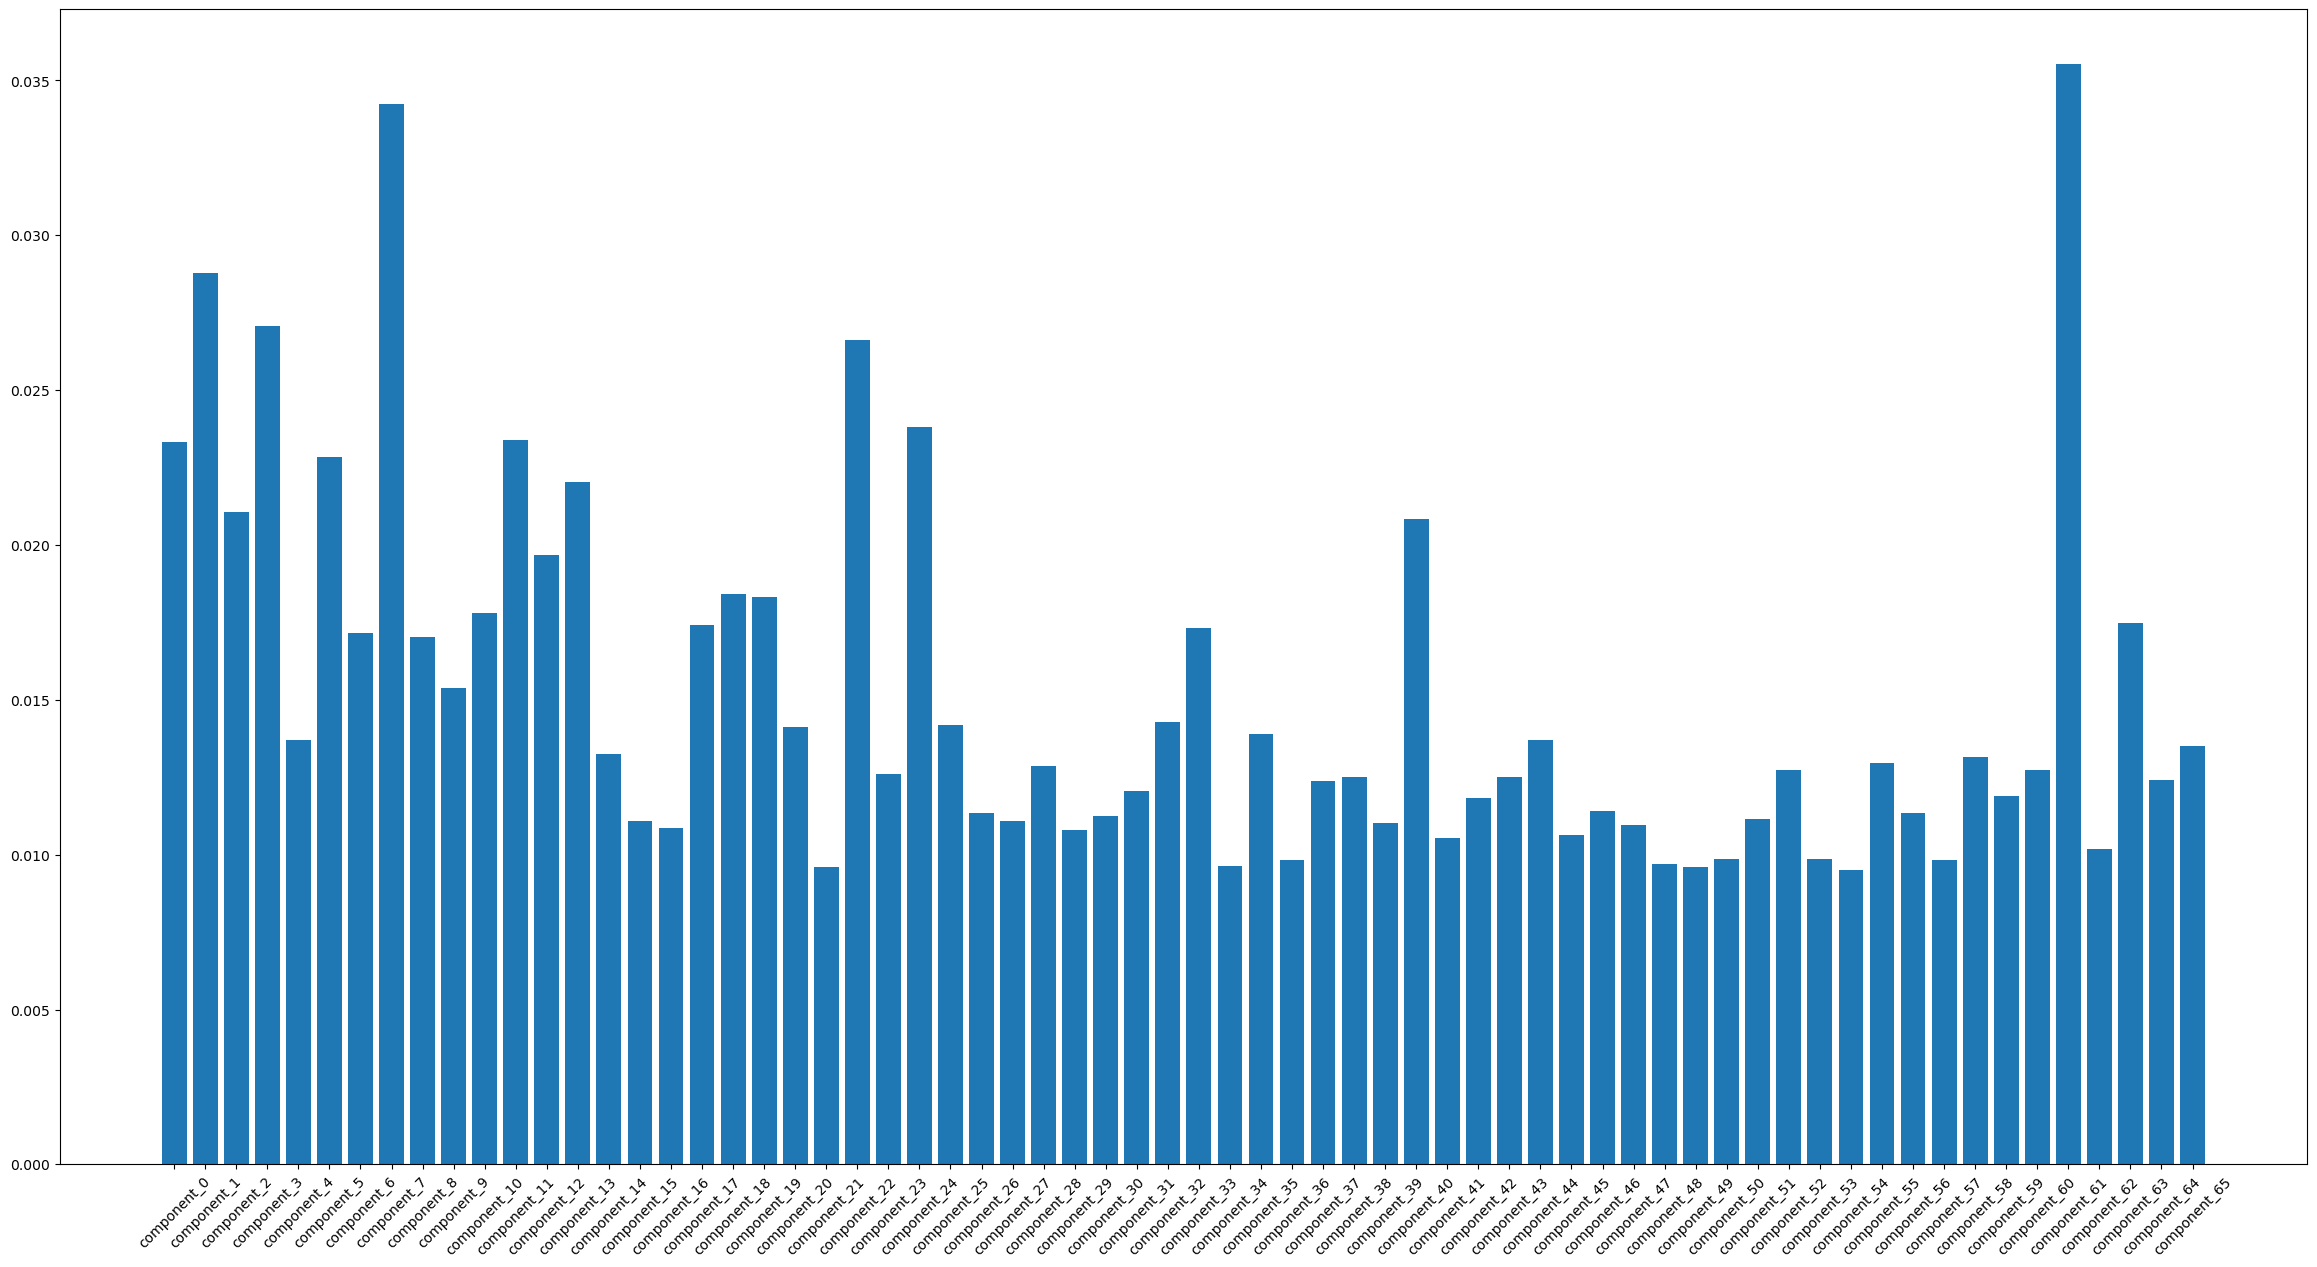

In [38]:
# Building a graph of all columns with their feature importance

rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(66)], 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(29,15))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

# 5. Building the prediction model.

### 1.0 Logistic Regression model(base model)

In [39]:
# Building the model

lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')

In [40]:
#Fitting the model to X and y train data

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [41]:
# Checking model accuracy on training data

lr.score(X_train, y_train)

0.9105162592189147

In [42]:
# Checking model accuracy on testing data

lr.score(X_test, y_test)

0.9117142857142857

### 2.0 Random Forest model with Grid search cv and cross validation.

In [43]:
# Building the model

rf = RandomForestClassifier(random_state=100, n_estimators=10)

In [44]:
# different parameters 

params = {
    'min_samples_split' : [5, 10, 15, 20],
    'min_samples_leaf' : [5, 10, 15, 20],
    'max_depth' : [5, 6, 7],
    'max_features' : [3, 4, 5]
}

In [45]:
# building Grid function with the parameters saved from before

grid = GridSearchCV(estimator=rf, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [46]:
# Fiiting the grid on X and y train 


grid.fit(X_train, y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_estimators=10,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [47]:
# storing the results of the model in a dataframe and getting the top 5 model data based on test score ranking

score_df = pd.DataFrame(grid.cv_results_)
score_df.nsmallest(5, 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
128,1.805987,0.192069,0.036725,0.006227,7,5,5,5,"{'max_depth': 7, 'max_features': 5, 'min_sampl...",0.941429,0.938214,0.941357,0.939424,0.940106,0.001356,1
129,1.805264,0.180201,0.035229,0.006629,7,5,5,10,"{'max_depth': 7, 'max_features': 5, 'min_sampl...",0.941429,0.938214,0.941357,0.939424,0.940106,0.001356,1
130,2.088094,0.051925,0.048655,0.007442,7,5,5,15,"{'max_depth': 7, 'max_features': 5, 'min_sampl...",0.940357,0.939071,0.940071,0.939781,0.939820,0.000478,3
116,1.721553,0.172109,0.042001,0.009398,7,4,10,5,"{'max_depth': 7, 'max_features': 4, 'min_sampl...",0.942643,0.937500,0.940929,0.937996,0.939767,0.002115,4
117,1.609484,0.143081,0.036056,0.007480,7,4,10,10,"{'max_depth': 7, 'max_features': 4, 'min_sampl...",0.942643,0.937500,0.940929,0.937996,0.939767,0.002115,4


In [48]:
# Taking the best model from all fiited model

best_dt = grid.best_estimator_

In [49]:
# train score of best fitted model

best_dt.score(X_train, y_train)

0.9424454008107288

In [50]:
# test score of best fitted model

best_dt.score(X_test, y_test)

0.9402857142857143

### 3.0 AdaBoost Classifier

In [51]:
# Building and fitting the model on X and y train

adaboost =  AdaBoostClassifier(random_state=100)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=100)

In [52]:
# Train score from the model

adaboost.score(X_train, y_train)

0.9400346434757764

In [53]:
# test score from the model

adaboost.score(X_test, y_test)

0.9389285714285714

In [54]:
# Dimentionality Reduction using PCA

pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [55]:
pca_again = PCA(0.99)
df_train_pca = pca_again.fit_transform(X_train)

### 3.5 Adaboost with Gridsearch cv

In [56]:
#Taking parameters

params = {
    'n_estimators' : [ 50, 80],
    'learning_rate' : [0.1, 0.5, 0.8],
    'base_estimator' : [lr]
}

In [57]:
# Building the grid

grid = GridSearchCV(estimator=adaboost, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [58]:
# fitting the model


grid.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=100), n_jobs=-1,
             param_grid={'base_estimator': [LogisticRegression(max_iter=1000,
                                                               solver='sag',
                                                               tol=0.001)],
                         'learning_rate': [0.1, 0.5, 0.8],
                         'n_estimators': [50, 80]},
             scoring='accuracy', verbose=1)

In [59]:
# storing the results of the model in a dataframe and getting the top 5 model data based on test score ranking

score_df = pd.DataFrame(grid.cv_results_)
score_df.nsmallest(5, 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,259.347489,22.761699,0.306230,0.037351,"LogisticRegression(max_iter=1000, solver='sag'...",0.1,50,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1
1,338.005024,20.110898,0.439337,0.046668,"LogisticRegression(max_iter=1000, solver='sag'...",0.1,80,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1
2,130.699462,9.969865,0.277931,0.044918,"LogisticRegression(max_iter=1000, solver='sag'...",0.5,50,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1
3,223.409847,19.272520,0.397813,0.051540,"LogisticRegression(max_iter=1000, solver='sag'...",0.5,80,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1
4,131.158602,9.600640,0.231051,0.058752,"LogisticRegression(max_iter=1000, solver='sag'...",0.8,50,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1


In [60]:
# Taking the best model from all fiited model

best_dt = grid.best_estimator_

In [61]:
# Train score from the model

adaboost.score(X_train, y_train)

0.9400346434757764

In [62]:
# test score from the model

adaboost.score(X_test, y_test)

0.9389285714285714

### 4.0 Decision Tree classifier with GridsearchCv

In [63]:
# building the model

dt = DecisionTreeClassifier(random_state=42)

In [64]:
# different parameters

params = {
    'min_samples_leaf' : [10, 15, 20, 25],
    'max_depth' : [3, 4, 5, 6],
}

In [65]:
# building the grid

grid = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [66]:
# fitting the model to X and y train


grid.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 15, 20, 25]},
             scoring='accuracy', verbose=1)

In [67]:
# storing the results of the model in a dataframe and getting the top 5 model data based on test score ranking

score_df = pd.DataFrame(grid.cv_results_)
score_df.nsmallest(5, 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
7,2.609042,0.454354,0.013126,0.004314,4,25,"{'max_depth': 4, 'min_samples_leaf': 25}",0.942500,0.940000,0.943000,0.939067,0.941142,0.001651,1
5,2.842175,0.287280,0.011958,0.002470,4,15,"{'max_depth': 4, 'min_samples_leaf': 15}",0.942429,0.940000,0.943000,0.939067,0.941124,0.001637,2
6,2.412132,0.298100,0.010281,0.001160,4,20,"{'max_depth': 4, 'min_samples_leaf': 20}",0.942429,0.940000,0.943000,0.939067,0.941124,0.001637,2
4,2.602050,0.360473,0.010337,0.001288,4,10,"{'max_depth': 4, 'min_samples_leaf': 10}",0.942429,0.940000,0.943000,0.938996,0.941106,0.001659,4
13,4.231734,0.531577,0.010020,0.000871,6,15,"{'max_depth': 6, 'min_samples_leaf': 15}",0.943071,0.939214,0.941286,0.939710,0.940820,0.001508,5


In [68]:
# taking best model from the fitted models

best_dt = grid.best_estimator_

In [70]:
# Train score from the model

best_dt.score(X_train, y_train)

0.9409632314862766

In [71]:
# test score from the model

best_dt.score(X_test, y_test)

0.9402142857142857

### 5.0 GBM Classifier with GridSearchCV

In [ ]:
# building the model

gb = GradientBoostingClassifier(random_state=100)

In [ ]:
# Different params

params = {
    'n_estimators' : [30, 40, 50],
    'max_features' : [11, 12, 13, 14],
    'max_depth' : [ 7, 8, 9, 10],
    'min_samples_leaf' : [10, 15, 20, 25],
}

In [ ]:
# building the grid 

grid = GridSearchCV(estimator=gb, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
# fitting the grid on X and y train data


grid.fit(X_train, y_train)

In [ ]:
# storing the results of the model in a dataframe and getting the top 5 model data based on test score ranking

score_df = pd.DataFrame(grid.cv_results_)
score_df.nsmallest(5, 'rank_test_score')

In [ ]:
# taking best model from the fitted models

best_dt = grid.best_estimator_

In [ ]:
# Train score from the model

best_dt.score(X_train, y_train)

In [ ]:
# test score from the model

best_dt.score(X_test, y_test)

# 6. Evaluating the model on Unseen test data and creating submission file.

In [72]:
# creating a new dataframe

submission_data = unseen.set_index('id')[cols]
submission_data.shape

(30000, 120)

In [73]:
# imputing the unseen data to get it ready for the model

missing_data_percent = submission_data.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'lo

In [74]:
submission_data[impute_cols] = imputer.transform(submission_data[impute_cols])

In [75]:
# checking if the unseen data still has any missing values

null_col = 100*(submission_data.isnull().sum()/length) != 0
null_col = submission_data.loc[:, col]
null_col

""
id
69999
70000
70001
70002
70003
...
99994
99995
99996


In [76]:
# Scaling the unseen data

submission_data[cols] = scaler.transform(submission_data[cols])

In [77]:
# predicting the churn probability from the data

unseen['churn_probability'] = best_dt.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


<Axes: xlabel='churn_probability', ylabel='Count'>

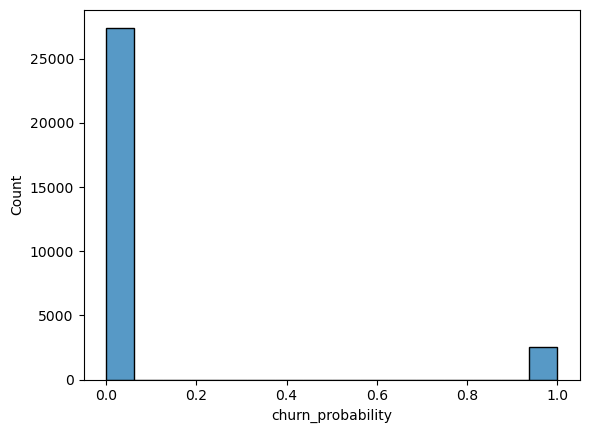

In [78]:
# Histplot of new churn probability predicted by the model

sns.histplot(output['churn_probability'])

In [79]:
## Submission file. Used to submit in Kaggle and upgrad platform.

output.to_csv('submission_pca_rf_06mar_4.csv',index=False)